# Abs Likelihood

## Model

- $p(y \mid x) = \delta(y-\mathrm{abs}(x))$
- infer gaussian $x$ prior $\mathcal{N}(r,v)$ from its abs value 
$y = \mathrm{abs}(x) \in \mathbb{R}_+$
- $Z =  \int dx\, p(y\mid x) e^{-\frac{1}{2} a x^2 + b x} =  \sum_{x \in \pm y} e^{-\frac{1}{2} a x^2 + b x}$

In [1]:
%matplotlib inline
import numpy as np, pandas as pd
from tramp.likelihoods import AbsLikelihood
from tramp.experiments import run_experiments, qplot

## Posterior

In [2]:
def run_posterior(y, r, v):
    likelihood = AbsLikelihood(np.array([y]))
    a, b = 1/v, r/v
    r_hat, v_hat = likelihood.compute_backward_posterior(a, b, y)
    return dict(a=a, b=b, r_hat=r_hat, v_hat=v_hat)

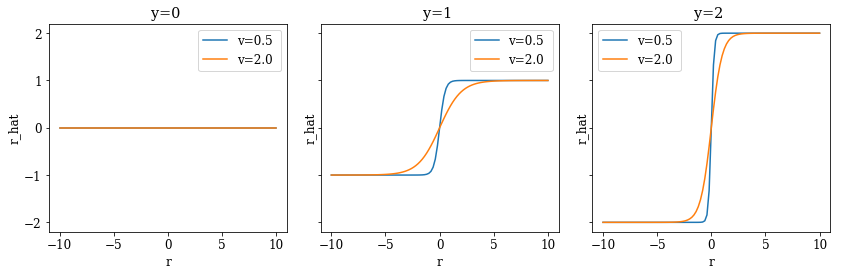

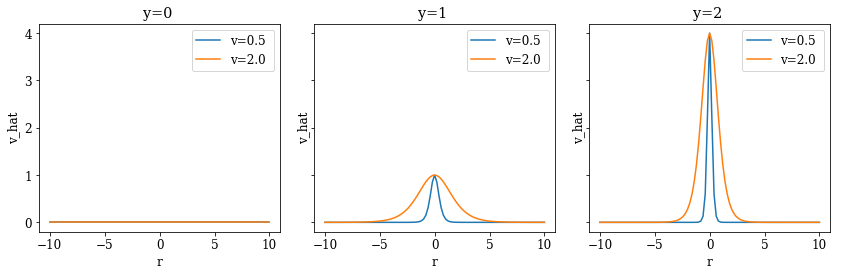

In [3]:
df = run_experiments(run_posterior, y=[0, 1, 2], v = [0.5, 2], r = np.linspace(-10,10,101))
qplot(df, x="r", y="r_hat", color="v", column="y")
qplot(df, x="r", y="v_hat", color="v", column="y")

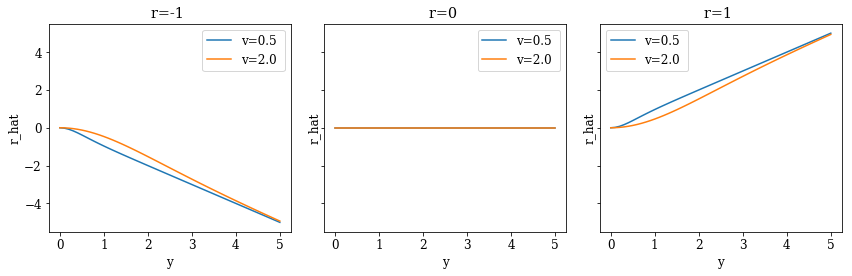

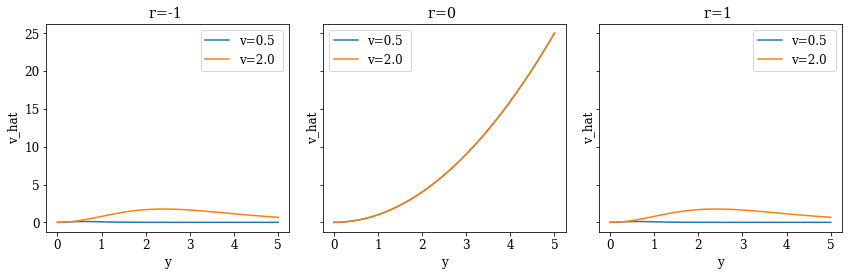

In [4]:
df = run_experiments(run_posterior, y=np.linspace(0,5,51), v = [0.5, 2], r = [-1,0,1])
qplot(df, x="y", y="r_hat", color="v", column="r")
qplot(df, x="y", y="v_hat", color="v", column="r")

## Error function

Bad value : $a\tau - 1 < 0$ ie $ a = \frac{1}{v} < \frac{1}{\tau}$ ie $v > \tau$

$\tau$ supposed to be the second moment of $x$ so it makes sense !

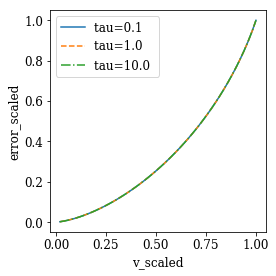

In [5]:
#%run likelihood_abs_error.py
df = pd.read_csv("likelihood_abs_error.csv")
qplot(
    df, x="v_scaled", y="error_scaled", linestyle="tau", xlog=False
)

## Numerical stability


In [6]:
# test initial condition a=tau
likelihood = AbsLikelihood(y=np.ones(1))
for tau in [1., 2.]:
    print(f"tau={tau}")
    print(likelihood.compute_backward_posterior(az=tau, bz=0., y=+1))
    print(likelihood.compute_backward_error(az=tau+1e-15,tau_z=tau))
    print(likelihood.compute_backward_error(az=tau-1e-15,tau_z=tau))
    print()

tau=1.0
(0.0, 1.0)
0.9999999999999971
1.0000000000000013

tau=2.0
(0.0, 1.0)
0.16411407378467885
0.16411407378467904

